In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import random

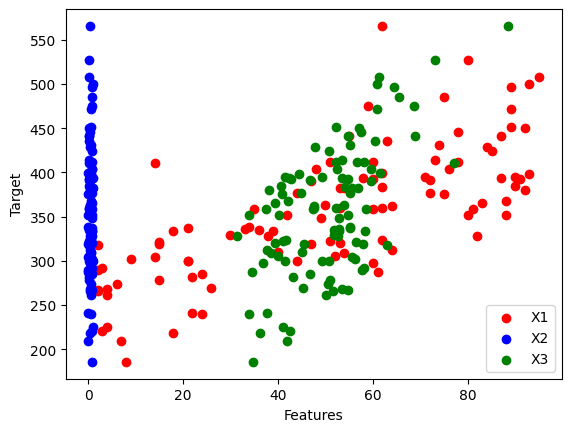

In [2]:
np.random.seed(42)
n_samples = 100
X1 = np.random.randint(1, 100, size=n_samples)
X2 = np.random.uniform(0,1, size=n_samples)
X3 = np.random.normal(50,10, size=n_samples)

y = 2*X1 + 2*X2 + 5*X3 + np.random.normal(0,10, size=n_samples)

plt.scatter(X1, y, color='red', label = 'X1')
plt.scatter(X2, y, color='blue', label = 'X2')
plt.scatter(X3, y, color='green', label = 'X3')
plt.xlabel('Features')
plt.ylabel('Target')
plt.legend()
plt.show()

In [3]:
df = pd.DataFrame({'Feature 1' : X1,
                   'Feature 2' : X2,
                   'Feature 3' : X3,
                   'Target' : y})
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,52,0.280935,40.094637,305.677853
1,93,0.542696,44.337023,397.993058
2,15,0.140924,50.996514,278.111380
3,72,0.802197,44.965243,377.226589
4,61,0.074551,34.493366,287.312263


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
X = df[['Feature 1', 'Feature 2', 'Feature 3']]
y = df['Target']

In [6]:
x_tr, x_tt, y_tr, y_tt = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
model = LinearRegression()
model.fit(x_tr, y_tr)

LinearRegression()

In [8]:
y_pred = model.predict(x_tt)

In [9]:
pd.DataFrame({'Actual': y_tt, 'Predicted': y_pred})

,Actual,Predicted
26,281.459514,258.618565
86,403.770783,396.268696
2,278.111380,282.848054
55,394.842113,388.910964
75,382.380980,389.546875
93,424.315516,426.445417
16,352.401918,350.793263
73,308.553811,304.369282
54,302.203659,302.291174
95,328.044743,325.111305


In [10]:
from sklearn.metrics import r2_score

In [11]:
r2 = r2_score(y_tt, y_pred)

n = len(x_tt)
p = x_tt.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print('R2 Score: ', r2)
print('Adjusted R2 Score: ', adj_r2)

R2 Score:  0.9763228889187477
Adjusted R2 Score:  0.9718834305910129


In [12]:
from scipy import stats

In [13]:
_, p_value = stats.f_oneway(df['Feature 1'], df['Feature 2'], df['Feature 3'])
print('ANOVA p-Value: ', p_value)

ANOVA p-Value:  2.1448788317738615e-67


In [14]:
_, p_value_1 = stats.ttest_ind(df['Feature 1'], y_tt)
_, p_value_2 = stats.ttest_ind(df['Feature 2'], y_tt)
_, p_value_3 = stats.ttest_ind(df['Feature 3'], y_tt)
print(p_value_1, p_value_2, p_value_3)

2.8490014978684055e-60 5.384383803731955e-83 4.525095580876946e-73


In [15]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between the features and the target.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between the features and the target.")

Reject the null hypothesis. There is a significant relationship between the features and the target.


In [29]:
least_significant_idx = np.argmin([p_value_1, p_value_2, p_value_3])
least_significant_idx

1

In [30]:
X_new = X.drop(X.columns[1], axis=1)
X_new

,Feature 1,Feature 3
0,52,40.094637
1,93,44.337023
2,15,50.996514
3,72,44.965243
4,61,34.493366
...,...,...
95,82,31.327348
96,53,56.862602
97,24,33.872841
98,26,45.280681


In [31]:
x_tr, x_tt, y_tr, y_tt = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [32]:
model = LinearRegression()
model.fit(x_tr, y_tr)

LinearRegression()

In [33]:
y_pred = model.predict(x_tt)

In [34]:
pd.DataFrame({'Actual': y_tt, 'Predicted': y_pred})

,Actual,Predicted
26,281.459514,261.484357
86,403.770783,392.739800
2,278.111380,285.401686
55,394.842113,388.525817
75,382.380980,385.603999
93,424.315516,424.175172
16,352.401918,348.081142
73,308.553811,302.826008
54,302.203659,298.989597
95,328.044743,323.490571


In [35]:
from sklearn.metrics import r2_score

In [36]:
r2 = r2_score(y_tt, y_pred)

n = len(x_tt)
p = x_tt.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print('R2 Score: ', r2)
print('Adjusted R2 Score: ', adj_r2)

R2 Score:  0.9777790084753585
Adjusted R2 Score:  0.9751647741783418
